Wir haben eine Datenliste gegeben und wollen nund den Q-Q plot machen, um die abweichung von der Standardabweichung zu bestimmen. Gegeben sind folgende Daten:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
from scipy.stats import norm, probplot

x = Series([24.4, 27.6, 27.8, 27.9, 28.5, 30.1, 30.3, 31.7, 32.2, 32.8, 
            33.3, 33.5, 34.1, 34.6, 35.8, 35.9, 36.8, 37.1, 39.2, 39.7])

In [3]:
x.head()

0    24.4
1    27.6
2    27.8
3    27.9
4    28.5
dtype: float64

Nun berechnen wir:
    
\begin{align}
\alpha_k = \frac{k - 0.5}{n}
\end{align}

Wobei `k` = 1, ..., n und `n` = anzahl werte (in diesem fall `x.size`)

In [4]:
alphak = (np.arange(1, x.size + 1) - 0.5) / x.size

In [6]:
alphak

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

Als naechstes berechnen wir den empirischen mittelwert und die standardabweichung:

In [7]:
mean, std = x.mean(), x.std()

In [8]:
mean, std

(32.665000000000006, 4.149733662981784)

Nun berechnen wir die Normalverteilung mit dem mittelwert $mean$ und standardabweichung $std$: $N(mean, std^2) = N(32.67, 4.15^2)$ fuer jedes $\alpha_k$:

In [15]:
quantile_theor = norm.ppf(q=alphak, loc=mean, scale=std)

In [16]:
quantile_theor

array([24.53167148, 26.6913278 , 27.89135645, 28.78670336, 29.53022884,
       30.18445468, 30.78200776, 31.34273151, 31.8802089 , 32.40478357,
       32.92521643, 33.4497911 , 33.98726849, 34.54799224, 35.14554532,
       35.79977116, 36.54329664, 37.43864355, 38.6386722 , 40.79832852])

Wir sortieren die Messdaten (damit sie im plot auch sinn machen)

In [17]:
quantile_empir = np.sort(x)

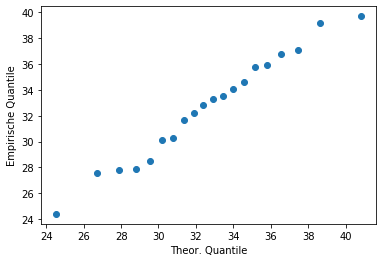

In [19]:
plt.xlabel("Theor. Quantile")
plt.ylabel("Empirische Quantile")
plt.plot(quantile_theor, quantile_empir, "o")

plt.show()